## Import Packages

In [ ]:
def helper_display_img(image, title):
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

In [ ]:
pip install opencv-python torch torchvision numpy ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 878.7/878.7 kB 15.8 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np

from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

from ultralytics import YOLO

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

# YOLO v8

In [ ]:
'''# Verify and load the image
image_path = '/tmp/crosswalk-featured.jpg'  # Update to your correct path
image = cv2.imread(image_path)

# Check if image was loaded successfully
if image is None:
    raise FileNotFoundError("Error: Image not found or unable to open.")

# Convert image to RGB for visualization
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display original image
helper_display_img(image_rgb, "Original Image")'''

## Import Image

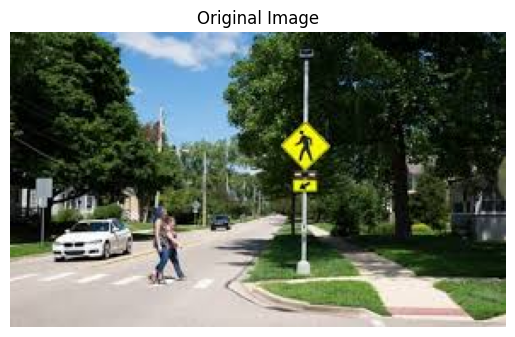

In [ ]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQuzdMwQ1lkqOF-Oijvr6QlDhwLpRSJViUdYw&s"

image = Image.open(BytesIO(requests.get(url).content))
image_rgb = np.array(image)
helper_display_img(image_rgb, "Original Image")

## Model YOLO

In [ ]:
# Load YOLOv8 model
model = YOLO('yolov8n.pt')

In [ ]:
# Menampilkan label pada dataset
names = results[0].names
names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou


0: 384x640 1 person, 138.7ms
Speed: 3.4ms preprocess, 138.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


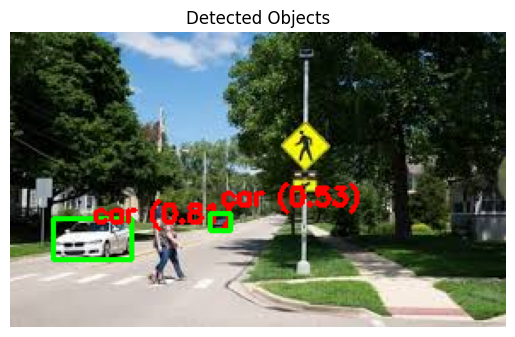

In [ ]:
# Run detection
c

# Visualization function with bounding boxes
def plot_detections(image, results):
    for box in results[0].boxes:
        x, y, w, h = map(int, box.xywh[0])
        confidence = box.conf[0]
        label = results[0].names[int(box.cls)]

        # Eliminating weak predictions with minimum probability
        if confidence > 0.5:
            # Draw bounding box and label on image
            cv2.rectangle(image_rgb, (x - w // 2, y - h // 2), (x + w // 2, y + h // 2), (0, 255, 0), 2)
            cv2.putText(image_rgb, f"{label} ({confidence:.2f})", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display
    helper_display_img(image_rgb, "Detected Objects")
    plt.axis('off')
    plt.show()

# Display detection results
plot_detections(image, results)